In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the input

In [3]:
import scipy.io 
import numpy as np

mat = scipy.io.loadmat('/content/drive/MyDrive/Impulse_19/Task#1/Task1.mat')

**ORTHOGONAL MATCHING PURSUIT ALGORITHM TO FIND 32 NON-ZERO TERMS FOR x**

In [4]:
def OMP(A, y, non_zero_terms):
  residue = y
  x = np.zeros(A.shape[1])
  
  for _ in range(non_zero_terms):
    dot = np.dot(A.T, residue)        # dot product of all columns of A with y
    dot = dot.reshape((-1,))        

    index = np.argmax(np.abs(dot))    # consider maximum dot product(atom with strongest influence) and ensure that already considered atom in not considered again
    while(x[index] != 0): 
      dot[index] = 0
      index = np.argmax(np.abs(dot))

    x[index] = dot[index]                           # update x
    residue = residue - dot[index] * A[:, index]    # update the residue
  
  return x

1st subquestion 

In [5]:
A = np.array([[-0.707, 0.8, 0], [0.707, 0.6, -1]])
y = np.array([1.65, -0.25])
y = y.reshape((-1,))

In [6]:
x = OMP(A, y, 3)
print(x)
# np.save('/content/drive/MyDrive/Impulse_19/Task#1/Task#1_1.npy', x)

[-1.3433      0.98005738 -0.11167867]


2nd subquestion. Load A and y and preprocess it for easy use

In [7]:
A = mat['A']
y = mat['y']
y = y.reshape((-1,))
print(A.shape)
print(y.shape)

(32, 64)
(32,)


In [8]:
non_zero_terms = 10

x = OMP(A, y, non_zero_terms)
print(x)
# np.save('/content/drive/MyDrive/Impulse_19/Task#1/Task#1_2.npy', x)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.         -1.31811487  0.          0.
  0.          0.          0.          0.          0.          0.19376158
  0.          0.          0.29187457  0.          0.          0.
  0.          0.         -0.9353942   0.          0.          0.
  1.35822363  0.          0.          0.          0.          0.
 -0.17800746  0.         -0.69484765  0.          0.          0.
  0.         -0.18069588  0.          0.          0.          0.
  0.          0.          0.         -0.76562654  0.          0.
  0.          0.          0.55493764  0.          0.          0.
  0.          0.          0.          0.        ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


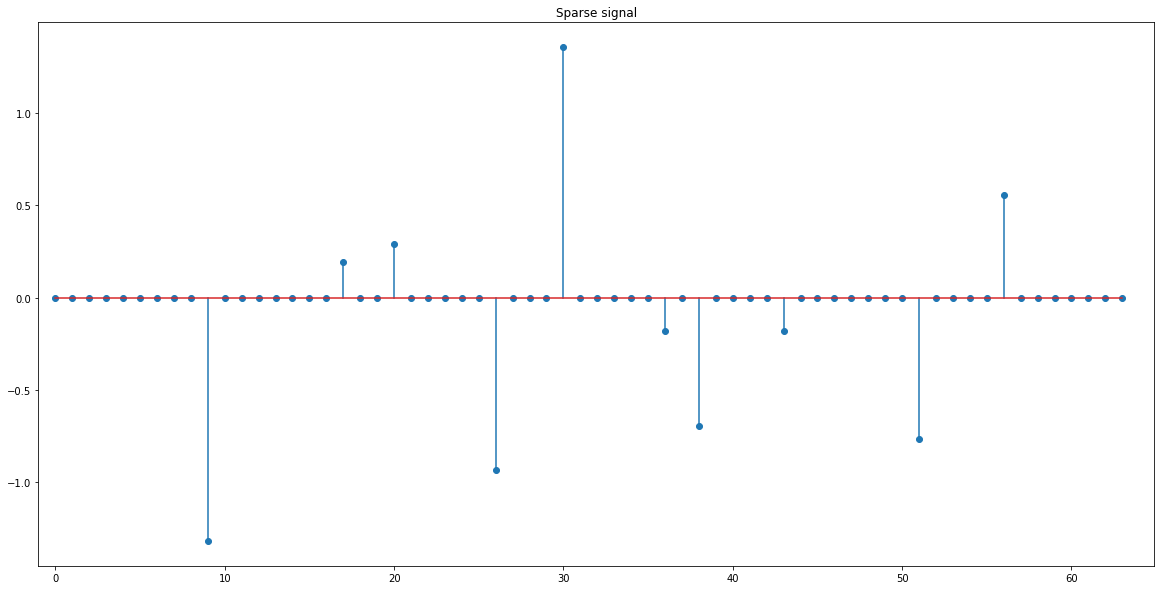

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.xlim(-1, A.shape[1] + 0.9)
plt.title("Sparse signal")
plt.stem(x)
plt.show()

In [10]:
ypred = np.matmul(A, x)
err = np.sum(np.sqrt(np.square(ypred - y)))

print('the avg. error from original y is {}'.format(err))

the avg. error from original y is 1.4053655877265512
